HASIL ANALISIS (setelah dinormalisasi)
- **Random Forest**

Parameter: n_estimators=300, min_samples_leaf=1, min_samples_split=2
1. **Akurasi: 0.9904350104821803**
2. Precision: 0.9913500678426052
3. Recall: 0.9962502130560763
4. F1 Score: 0.993794100144521
5. Specificity: 0.9711048158640226
6. AUC-ROC Score: 0.9836775144600495

Running Time Predict Test: 0.3995342254638672 seconds

- **SVM**

Parameter: C: 10, gamma: 0.1, kernel: rbf

1. **Akurasi: 0.9905660377358491**
2. Precision: 0.9921861729233905
3. Recall: 0.9955684336117266
4. F1 Score: 0.993874425727412
5. Specificity: 0.9739376770538244
6. AUC-ROC Score: 0.9847530553327755

Running Time Predict Test: 1.482041358947754 seconds

- **Ensemble dengan WMA**

Nilai weight yang digunakan

RF Weight: 0.49996692902969775

SVM Weight: 0.5000330709703023

1. **Akurasi: 0.9917452830188679**
2. Precision: 0.9926994906621393
3. Recall: 0.9965911027782512
4. F1 Score: 0.9946414901760653
5. Specificity: 0.9756373937677054
6. AUC-ROC Score: 0.9861142482729783

Running Time Predict Test: 0.08035588264465332 seconds


In [ ]:
0.9904350104821803+0.9905660377358491

1.9810010482180294

In [ ]:
0.9825396380871354 - 0.9694256201320006

0.013114017955134782

In [ ]:
0.49976838064985774 + 0.5002316193501423

1.0

#**PREPROCESSING**

In [ ]:
import pandas as pd

kolom = [i for i in range(28)]
df=pd.read_csv('tain_DL (1).csv',header=None)
df.columns = kolom
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,30,3,23,22,9,18,8,33,20,30,...,0,7,0.050,0.345,0.264,0.366,5.685,35450.59,48.73,1
1,29,4,21,19,11,18,6,27,21,28,...,0,11,0.069,0.320,0.279,0.379,5.925,35124.94,40.29,1
2,22,4,26,27,16,27,8,20,31,25,...,3,25,0.119,0.295,0.292,0.373,5.414,41959.52,31.36,1
3,24,10,25,35,9,30,12,29,27,47,...,0,13,0.055,0.377,0.259,0.342,5.406,45144.32,42.14,1
4,23,6,19,26,14,19,9,24,24,31,...,3,12,0.080,0.321,0.249,0.360,7.114,41293.92,36.98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38152,12,2,14,6,7,16,4,2,2,24,...,1,7,0.087,0.273,0.297,0.419,5.489,18981.48,36.47,0
38153,58,3,26,23,11,49,10,19,10,31,...,4,8,0.055,0.332,0.327,0.310,5.112,43345.67,35.80,0
38154,24,4,18,10,6,17,7,6,2,13,...,2,5,0.070,0.274,0.323,0.355,4.386,19556.32,10.35,0
38155,55,2,12,13,22,36,10,34,4,52,...,12,7,0.101,0.345,0.241,0.448,7.169,43728.09,33.92,0


In [ ]:
X = df.drop([27], axis=1)

y = df[27]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gabungkan X dan y untuk plot
df_swarm = X.copy()
df_swarm['Target'] = y

# Membuat swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df_swarm, orient='h')  # orient='h' untuk orientasi horizontal

# Memberikan label sumbu dan judul
plt.xlabel('Nilai Fitur')
plt.ylabel('Fitur')
plt.title('Swarm Plot dari Fitur-fitur')

# Menampilkan plot
plt.show()

In [ ]:
# Menampilkan informasi tentang dataset
print("Jumlah baris:", len(df))
print("Jumlah fitur:", X.shape[1])
print("Jumlah kelas:", len(y.unique()))

Jumlah baris: 38157
Jumlah fitur: 27
Jumlah kelas: 2


In [ ]:
#split data untuk data training dan data testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
# Menghitung jumlah data train dan data test untuk masing-masing kelas
train_pos_count = y_train[y_train == 1].shape[0]
train_neg_count = y_train[y_train == 0].shape[0]

test_pos_count = y_test[y_test == 1].shape[0]
test_neg_count = y_test[y_test == 0].shape[0]

print("Jumlah data train:")
print("Positif:", train_pos_count)
print("Negatif:", train_neg_count)

print("\nJumlah data test:")
print("Positif:", test_pos_count)
print("Negatif:", test_neg_count)

Jumlah data train:
Positif: 23420
Negatif: 7105

Jumlah data test:
Positif: 5867
Negatif: 1765


In [ ]:
import pandas as pd

# Mengatur agar semua kolom dapat ditampilkan
pd.set_option('display.max_columns', None)

# Tampilkan lima data teratas dari data training
print("Data Training (lima data teratas):")
print(X_train.head())

# Tampilkan lima data teratas dari data testing
print("\nData Testing (lima data teratas):")
print(X_test.head())

Data Training (lima data teratas):
       0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
31777  17   2  12   6  10  10   2   4  10  14   4   0   8   4  13   9  12  14   
35224  51   5  16  14  34  33  10  26   6  51  15  18  25  22  20  24  36  45   
11494  33   3  29  37  22  29  14  22  30  60  18  18  11  24  15  29  26  24   
30713  54   1  37  34  21  23  11  31  17  46   8  21  27  20  41  31  42  28   
33849   8   0   6   2   3   9   4   3   2   6   4   4   7   2   9   9   2   8   

       18  19     20     21     22     23     24        25     26  
31777   0   2  0.078  0.331  0.253  0.364  9.424  24081.73  49.89  
35224  17  12  0.130  0.282  0.239  0.456  6.196  40907.21  28.06  
11494   4  15  0.089  0.384  0.251  0.374  5.125  52351.17  34.98  
30713   5   9  0.069  0.314  0.274  0.359  5.449  56565.97  41.76  
33849   1   6  0.105  0.232  0.368  0.305  9.515  10580.83  44.31  

Data Testing (lima data teratas):
        0   1    2    3   4    5   

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [ ]:
import pandas as pd

# Mengonversi data yang sudah dinormalisasi menjadi DataFrame
X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_test.columns)

# Menampilkan lima data teratas dari data training yang sudah dinormalisasi
print("Data Training yang Sudah Dinormalisasi (lima data teratas):")
print(X_train_normalized_df.head())

# Menampilkan lima data teratas dari data testing yang sudah dinormalisasi
print("\nData Testing yang Sudah Dinormalisasi (lima data teratas):")
print(X_test_normalized_df.head())

Data Training yang Sudah Dinormalisasi (lima data teratas):
         0         1         2         3         4         5         6   \
0 -0.678469 -0.029374 -0.587416 -0.876414 -0.494838 -0.807647 -0.891193   
1  0.626221  1.277067 -0.387902 -0.566260  1.404814  0.142459  0.314109   
2 -0.064497  0.406106  0.260519  0.325433  0.454988 -0.022777  0.916760   
3  0.741341 -0.464855  0.659547  0.209125  0.375836 -0.270631  0.464772   
4 -1.023828 -0.900335 -0.886688 -1.031491 -1.048903 -0.848956 -0.589868   

         7         8         9         10        11        12        13  \
0 -1.171318 -0.549548 -0.929893 -0.768921 -0.895705 -0.586530 -0.861278   
1  0.023928 -0.705826  0.486200  0.857684  0.047066  0.698921  0.448326   
2 -0.193389  0.231845  0.830656  1.301304  0.047066 -0.359686  0.593837   
3  0.295575 -0.276060  0.294836 -0.177428  0.204194  0.850151  0.302814   
4 -1.225647 -0.862105 -1.236075 -0.768921 -0.686201 -0.662145 -1.006790   

         14        15        16       

#**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc_classifier = RandomForestClassifier()

param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              'criterion': ['gini','entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [1, 2, 3, 4, 5]
              }

grid = GridSearchCV(estimator=rfc_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_normalized, y_train)

best_params = grid.best_params_
print("RFC Best Parameters:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RFC Best Parameters: {'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 90}


In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier

#instantiate the classifier
rfc = RandomForestClassifier(n_estimators=90, min_samples_split=3, criterion='entropy', max_features='log2', random_state=42)

#fit the model
rfc.fit(X_train_normalized, y_train)

# Predict the Train set results
rfc_train_pred = rfc.predict(X_train_normalized)

start_time = time.time()

# Predict the Test set results
rfc_test_pred = rfc.predict(X_test_normalized)

# End time for test set prediction
end_time = time.time()

# Time taken for test set prediction
test_pred_time = end_time - start_time
print("Test set prediction time:", test_pred_time, "seconds")

Test set prediction time: 0.10513901710510254 seconds


In [ ]:
#cek akurasi data train dan data test random forest
from sklearn.metrics import accuracy_score

rfc_train_accuracy = accuracy_score(y_train, rfc_train_pred)
rfc_test_accuracy = accuracy_score(y_test, rfc_test_pred)

print("Random Forest Classifier:")
print("Accuracy on train data:", rfc_train_accuracy)
print("Accuracy on test data:", rfc_test_accuracy)

Random Forest Classifier:
Accuracy on train data: 0.99996723996724
Accuracy on test data: 0.9899109014675053


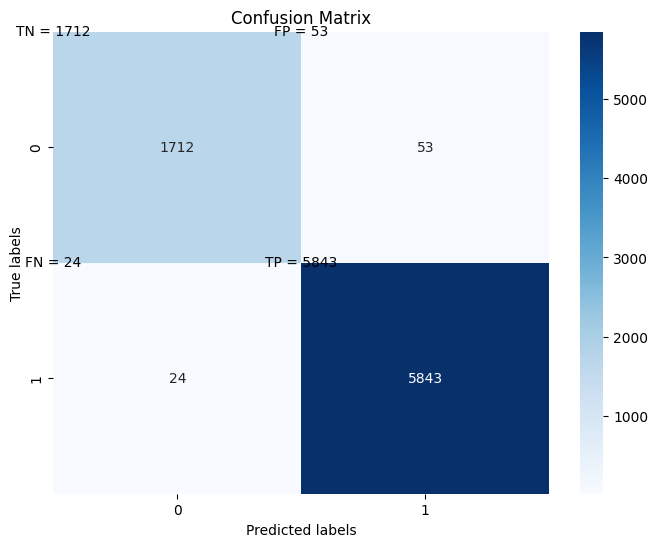

In [ ]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm_rf = confusion_matrix(y_test, rfc_test_pred)

# Menghitung TN, FP, FN, TP
TN = cm_rf[0,0]
FP = cm_rf[0,1]
FN = cm_rf[1,0]
TP = cm_rf[1,1]

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Menampilkan nilai TN, FP, FN, TP di plot
plt.text(0, 0, f'TN = {TN}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
plt.text(1, 0, f'FP = {FP}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
plt.text(0, 1, f'FN = {FN}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
plt.text(1, 1, f'TP = {TP}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

plt.show()

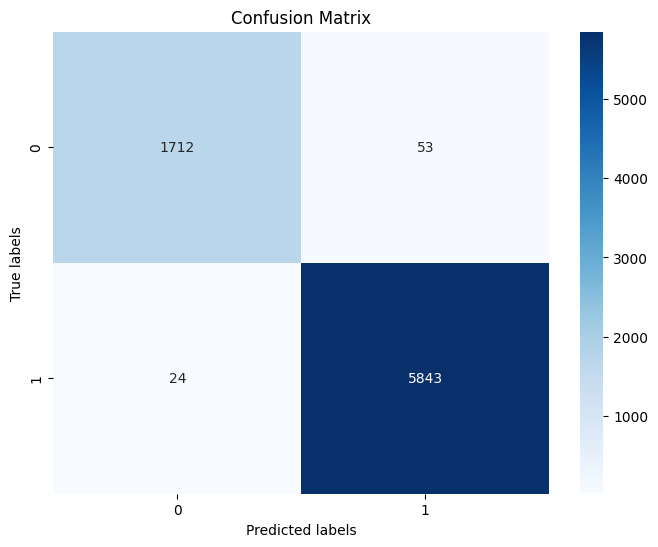

In [ ]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

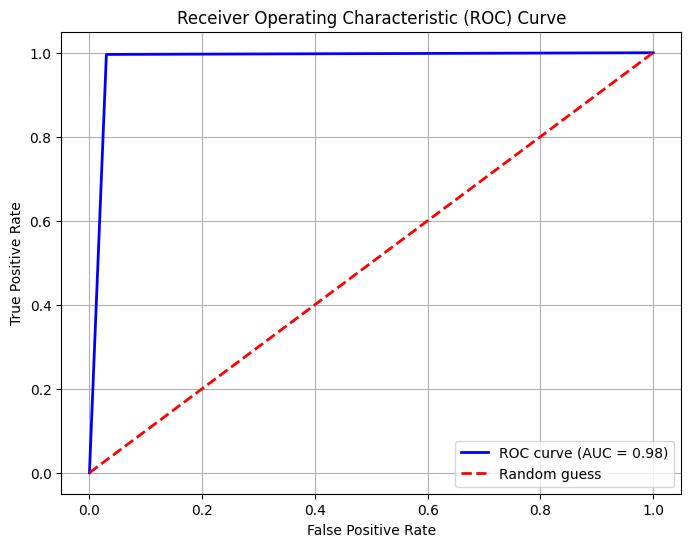

AUC-ROC Score: 0.9829404973610019


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Hitung nilai AUC-ROC
auc_roc_score = roc_auc_score(y_test, rfc_test_pred)

# Hitung kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, rfc_test_pred)

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_score)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("AUC-ROC Score:", auc_roc_score)

#**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_classifier = SVC()

param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

grid = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_normalized, y_train)

best_params = grid.best_params_
print("SVM Best Parameters:", best_params)

SVM Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
svm_classifier = SVC(**best_params)
svm_classifier.fit(X_train_normalized, y_train)

#Predict the Train set results
svm_train_pred = svm_classifier.predict(X_train_normalized)

#Predict the Test set results
svm_test_pred = svm_classifier.predict(X_test_normalized)

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', C=10, gamma=0.1, probability = True, random_state=42)

svm_classifier.fit(X_train_normalized, y_train)

svm_train_pred = svm_classifier.predict(X_train_normalized)

import time

start_time_svm = time.time()

svm_test_pred = svm_classifier.predict(X_test_normalized)

end_time_svm = time.time()

# Time taken for test set prediction
test_pred_time_svm = end_time_svm - start_time_svm
print("Test set prediction time:", test_pred_time_svm, "seconds")

Test set prediction time: 0.9339449405670166 seconds


In [ ]:
#Menghitung nilai akurasi untuk data train dan data test
from sklearn.metrics import accuracy_score

svm_train_accuracy = accuracy_score(y_train, svm_train_pred)
svm_test_accuracy = accuracy_score(y_test, svm_test_pred)

print("Support Vector Machine Classifier:")
print("Accuracy on train data:", svm_train_accuracy)
print("Accuracy on test data:", svm_test_accuracy)

Support Vector Machine Classifier:
Accuracy on train data: 0.9963636363636363
Accuracy on test data: 0.9905660377358491


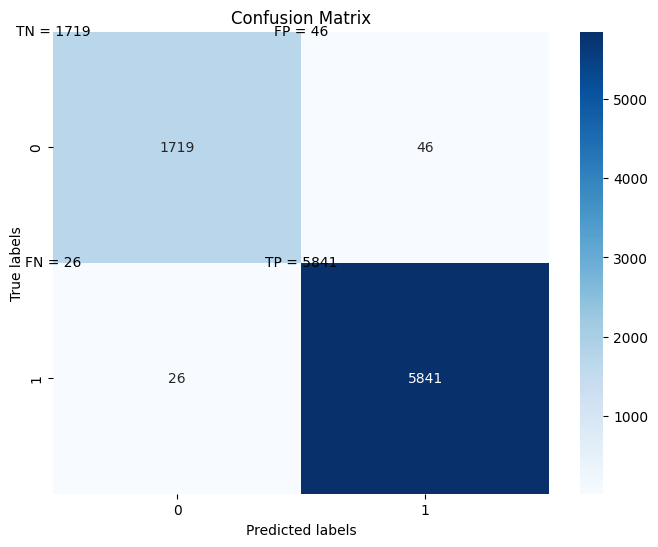

In [ ]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_test, svm_test_pred)

# Menghitung TN, FP, FN, TP
TN = cm_svm[0,0]
FP = cm_svm[0,1]
FN = cm_svm[1,0]
TP = cm_svm[1,1]

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Menampilkan nilai TN, FP, FN, TP di plot
plt.text(0, 0, f'TN = {TN}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
plt.text(1, 0, f'FP = {FP}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
plt.text(0, 1, f'FN = {FN}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
plt.text(1, 1, f'TP = {TP}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

plt.show()

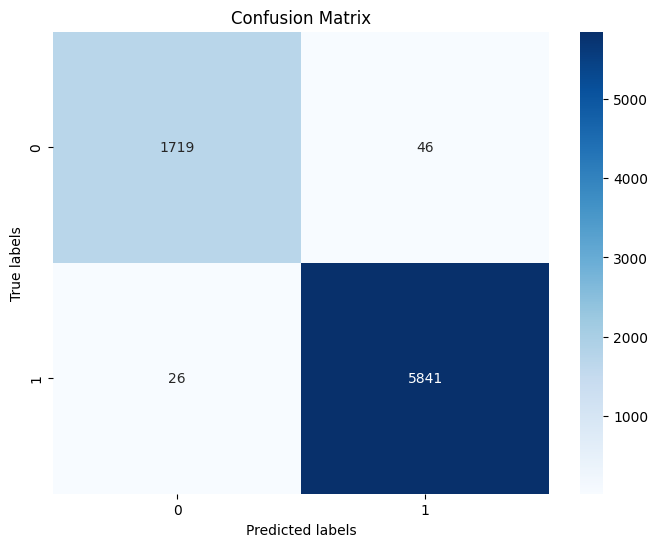

In [ ]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

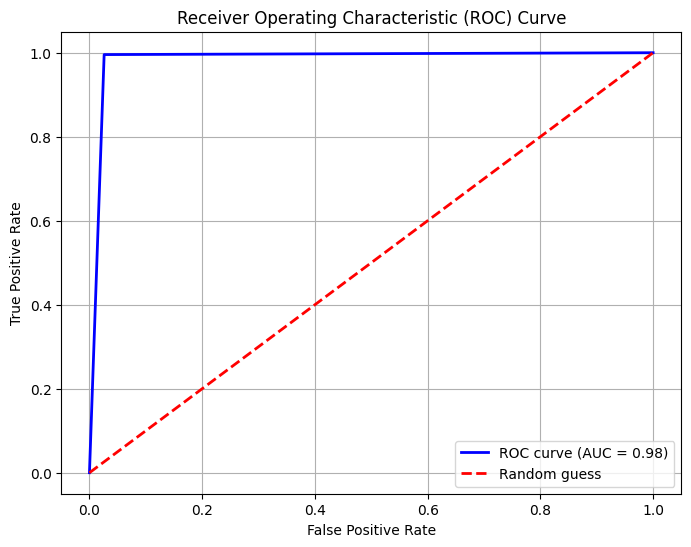

AUC-ROC Score: 0.9847530553327755


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Hitung nilai AUC-ROC
auc_roc_score = roc_auc_score(y_test, svm_test_pred)

# Hitung kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, svm_test_pred)

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_score)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("AUC-ROC Score:", auc_roc_score)

#**WMA**

In [ ]:
import numpy as np

In [ ]:
0.9899109014675053 + 0.9905660377358491

1.9804769392033543

In [ ]:
0.9899109014675053 / 1.9804769392033543

0.4998346013893483

In [ ]:
0.5001653986106517 + 0.4998346013893483

1.0

In [ ]:
total_accuracy = rfc_test_accuracy + svm_test_accuracy
rfc_weight = rfc_test_accuracy / total_accuracy
svm_weight = svm_test_accuracy / total_accuracy

print("RF Weight:", rfc_weight)
print("SVM Weight:", svm_weight)

RF Weight: 0.4998346013893483
SVM Weight: 0.5001653986106517


In [ ]:
0,9904350104821803 /  1.9810010482180294

(0, 4999669290296978.0)

In [ ]:
0.9501694014482163 + 0.0498305985517837

1.0

In [ ]:
# Buat array untuk menyimpan prediksi ensemble
ensemble_predictions = np.zeros_like(rfc_test_pred)

rfc_probs = rfc.predict_proba(X_test_normalized)
svm_probs = svm_classifier.predict_proba(X_test_normalized)

start_time_wma = time.time()

# Lakukan prediksi ensemble berdasarkan probabilitas dari masing-masing model
for i in range(len(X_test_normalized)):
    rfc_confidence = sum(index * prob for index, prob in enumerate(rfc_probs[i]))
    svm_confidence = sum(index * prob for index, prob in enumerate(svm_probs[i]))
    if (rfc_weight * rfc_confidence + svm_weight * svm_confidence) > 0.5:
        ensemble_predictions[i] = 1
    else:
        ensemble_predictions[i] = 0

end_time_wma = time.time()

# Time taken for test set prediction
test_pred_time_wma = end_time_wma - start_time_wma
print("Test set prediction time:", test_pred_time_wma, "seconds")

Test set prediction time: 0.04919075965881348 seconds


In [ ]:
#Menghitung nilai akurasi untuk data train dan data test
from sklearn.metrics import accuracy_score

wma_test_accuracy = accuracy_score(y_test, ensemble_predictions)

print("Accuracy on test data:", wma_test_accuracy)

Accuracy on test data: 0.9917452830188679


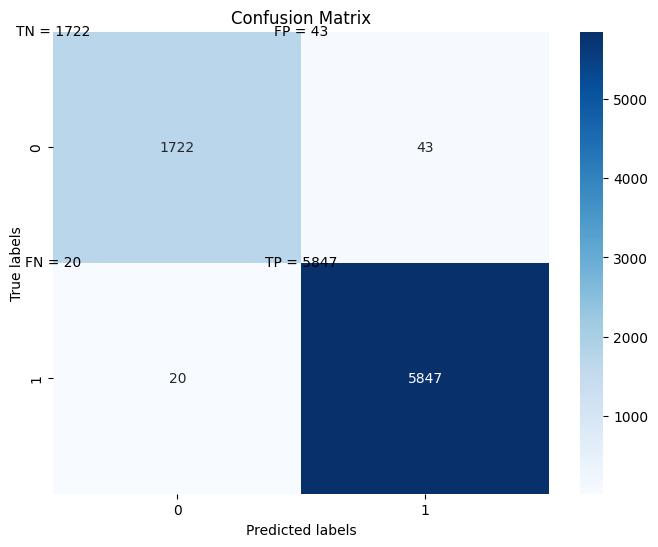

In [ ]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix

cm_wma = confusion_matrix(y_test, ensemble_predictions)

# Menghitung TN, FP, FN, TP
TN = cm_wma[0,0]
FP = cm_wma[0,1]
FN = cm_wma[1,0]
TP = cm_wma[1,1]

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_wma, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Menampilkan nilai TN, FP, FN, TP di plot
plt.text(0, 0, f'TN = {TN}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
plt.text(1, 0, f'FP = {FP}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
plt.text(0, 1, f'FN = {FN}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
plt.text(1, 1, f'TP = {TP}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

plt.show()

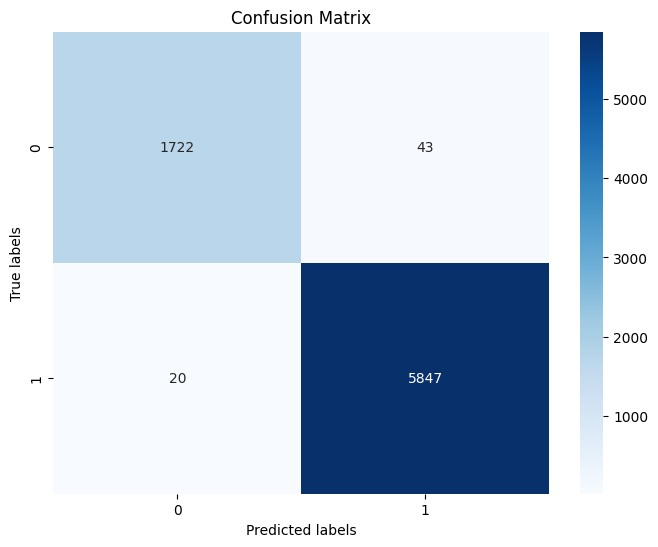

In [ ]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_wma, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

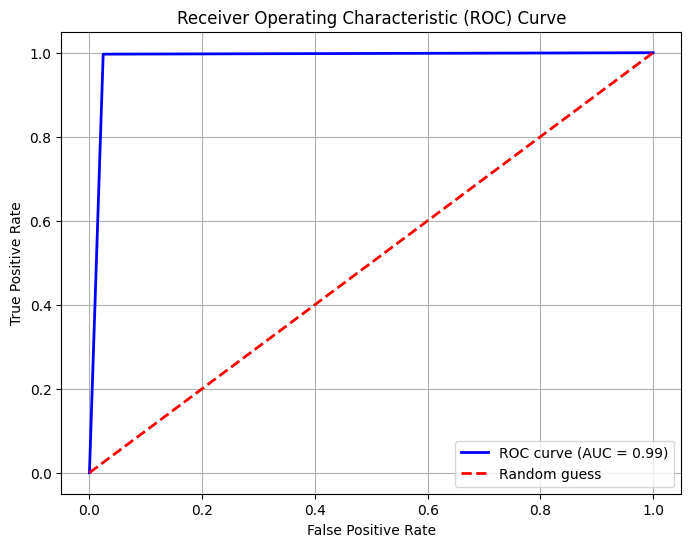

AUC-ROC Score: 0.9861142482729783


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Hitung nilai AUC-ROC
auc_roc_score = roc_auc_score(y_test, ensemble_predictions)

# Hitung kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, ensemble_predictions)

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_score)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("AUC-ROC Score:", auc_roc_score)